# 非监督聚类：Kmeans

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

In [74]:
iris = datasets.load_iris()
train_x = iris.data[0:120]
train_y = iris.target[0:120]
test_x = iris.data[120:]
test_y = iris.target[120:]

def create_plt_data(y):
    class_a = []
    class_b = []
    class_c = []
    for index in range(train_x.shape[0]):
        try:
            if y[index] == 0:
                class_a.append(train_x[index])
            elif y[index] == 1:
                class_b.append(train_x[index])
            elif y[index] == 2:
                class_c.append(train_x[index])
        except:
            print("Data has error.")
    return class_a, class_b, class_c

In [71]:
kmean = KMeans(n_clusters=3, random_state=0).fit(train_x)
train_result = kmean.predict(train_x)
test_result = kmean.predict(test_x)

## 使用原数据标签进行分色绘图

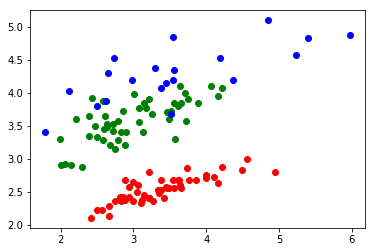

In [75]:
class_a, class_b, class_c = create_plt_data(train_y)
a_var, a_mean = np.var(class_a,axis=1), np.mean(class_a,axis=1)
b_var, b_mean = np.var(class_b,axis=1), np.mean(class_b,axis=1)
c_var, c_mean = np.var(class_c,axis=1), np.mean(class_c,axis=1)
plt.plot(a_var, a_mean, 'or')
plt.plot(b_var, b_mean, 'og')
plt.plot(c_var, c_mean, 'ob')
plt.show()

### 使用 Kmeans 分类后的标签进行分色绘图

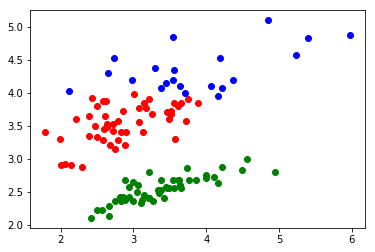

In [76]:
class_a, class_b, class_c = create_plt_data(train_result)
a_var, a_mean = np.var(class_a,axis=1), np.mean(class_a,axis=1)
b_var, b_mean = np.var(class_b,axis=1), np.mean(class_b,axis=1)
c_var, c_mean = np.var(class_c,axis=1), np.mean(class_c,axis=1)
plt.plot(a_var, a_mean, 'or')
plt.plot(b_var, b_mean, 'og')
plt.plot(c_var, c_mean, 'ob')
plt.show()

# 实战图像分割

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def load_img(path):
    image_file = cv2.imread(path)
    w,h,d = (image_file.shape)
    image = image_file.reshape(w*h , d)
    return w, h, d, image

In [3]:
def model(data, cluster_num, epoch):
    kmean = KMeans(n_clusters=cluster_num, random_state=0, max_iter=epoch).fit(data)
    labels = kmean.predict(data)
    return kmean, labels

In [97]:
def recreate_image(kmean, labels, w, h, d):
    new_image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            new_image[i][j] = kmean[labels[label_idx]]
            label_idx += 1
    return new_image

In [5]:
def show_img(result):
    plt.imshow(result)
    plt.show()

In [84]:
def main(img_path, cluster_num, epoch):
    w, h, d, data = load_img(img_path)
    kmean, labels = model(data, cluster_num, epoch)
    result = recreate_image(kmean.cluster_centers_, labels, w, h, d)
    show_img(result)

In [99]:
img = 'pic/kmean_test.jpg'

cluster_num = 7
epoch = 500

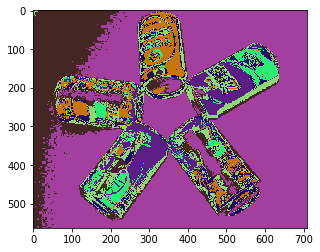

In [100]:
main(img, cluster_num, epoch)